In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("dataset/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.shape

(1338, 7)

In [8]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [9]:
df['sex'].unique()
df['sex']=df['sex'].map({'female':0,'male':1})

In [10]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9,0,yes,southwest,16884.924


In [11]:
df['smoker'].unique()
df['smoker']=df['smoker'].map({'yes':0,'no':1})

In [12]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9,0,0,southwest,16884.924


In [13]:
df['region'].unique()


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
df['region']=df['region'].map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [16]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [17]:
df.duplicated().sum()

np.int64(1)

In [18]:
df=df.drop_duplicates()

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [21]:
X=df.drop(['charges'],axis=1)
y=df['charges']

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [24]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [25]:
X_train

array([[-1.1576804 ,  0.97140947, -0.99692768, -0.90790804,  0.50029231,
         1.38394601],
       [-1.30061876,  0.97140947, -0.79276204,  0.7669042 ,  0.50029231,
         1.38394601],
       [ 0.91492586, -1.029432  ,  1.15466402,  0.7669042 ,  0.50029231,
         0.47798258],
       ...,
       [-1.37208794,  0.97140947, -1.4118716 , -0.07050192,  0.50029231,
        -1.33394429],
       [-0.08564268, -1.029432  , -0.41997378,  1.60431032,  0.50029231,
        -1.33394429],
       [-0.30005022, -1.029432  ,  0.87941237,  0.7669042 ,  0.50029231,
        -0.42798086]], shape=(1069, 6))

In [26]:
X_test

array([[ 0.70051832,  0.97140947, -1.3267337 , -0.90790804,  0.50029231,
         1.38394601],
       [-0.72886531, -1.029432  , -0.8167329 ,  2.44171645,  0.50029231,
        -1.33394429],
       [ 0.84345668, -1.029432  ,  0.96620343,  1.60431032,  0.50029231,
         0.47798258],
       ...,
       [-1.22914958, -1.029432  ,  0.6678075 ,  0.7669042 ,  0.50029231,
         1.38394601],
       [ 1.5581485 ,  0.97140947,  0.95215155, -0.07050192, -1.99883143,
        -1.33394429],
       [ 0.55757996, -1.029432  , -1.02833777, -0.90790804,  0.50029231,
         1.38394601]], shape=(268, 6))

In [27]:
from sklearn.linear_model import LinearRegression

regression= LinearRegression()

In [28]:
regression

LinearRegression()

In [29]:
regression.fit(X_train,y_train)

LinearRegression()

In [30]:
regression.coef_

array([ 3480.71806706,   -49.82673307,  1890.9752842 ,   637.82776712,
       -9224.0941585 ,   262.2899979 ])

In [31]:
regression.intercept_

np.float64(13030.203369289053)

<Axes: >

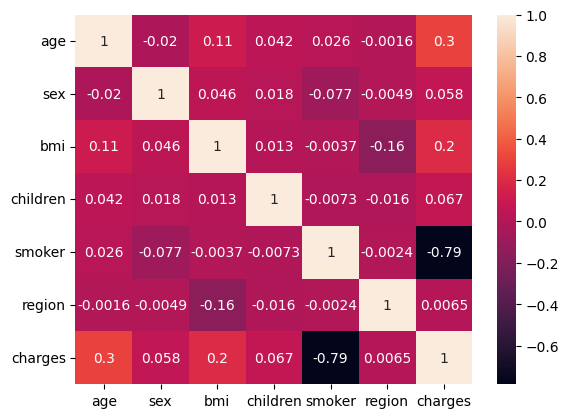

In [32]:
sns.heatmap(df.corr(),annot=True)

In [33]:
y_pred = regression.predict(X_test)

In [34]:
y_pred

array([ 8.08045019e+03,  5.59287112e+03,  1.43782987e+04,  3.17318195e+04,
        9.15835694e+03,  1.33610143e+04,  3.02576553e+04,  1.30864736e+03,
        1.08494254e+04,  1.13755485e+04,  1.04822214e+04,  3.31558608e+04,
        3.09123841e+04,  1.71688443e+04,  1.06361393e+04,  9.37424715e+03,
        3.96524338e+03,  3.19229863e+04,  3.08468457e+03,  5.47544373e+03,
        3.76844305e+03,  3.01552667e+04,  1.50768984e+04,  3.02746510e+04,
        3.10830548e+04,  5.52001772e+03,  3.56655758e+04,  3.63713163e+04,
        1.12979802e+04,  1.40664742e+04,  6.37519963e+03,  1.29381095e+04,
        6.79284837e+02,  1.19476924e+04,  3.97832706e+04,  1.21517558e+04,
        4.57717842e+03,  4.01652351e+03,  3.11475453e+04,  9.22301501e+03,
        6.86852604e+03,  3.00358113e+04,  3.49732855e+04,  1.21709787e+04,
        7.46262777e+03,  3.27014535e+03,  6.02195905e+03,  8.81742438e+03,
        4.32171874e+03,  9.25718479e+03,  6.82679737e+03,  1.18887556e+04,
        3.11350727e+04,  

In [35]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

35493102.61165054
4182.3531552883005
5957.608799816462


In [36]:
df = pd.DataFrame({"Actual":y_test,"Prediction":y_pred})
df

,Actual,Prediction
900,8688.85885,8080.450186
1064,5708.86700,5592.871120
1256,11436.73815,14378.298655
298,38746.35510,31731.819541
237,4463.20510,9158.356944
...,...,...
534,13831.11520,16952.682449
542,13887.20400,15496.907965
760,3925.75820,6303.385531
1284,47403.88000,38248.332909


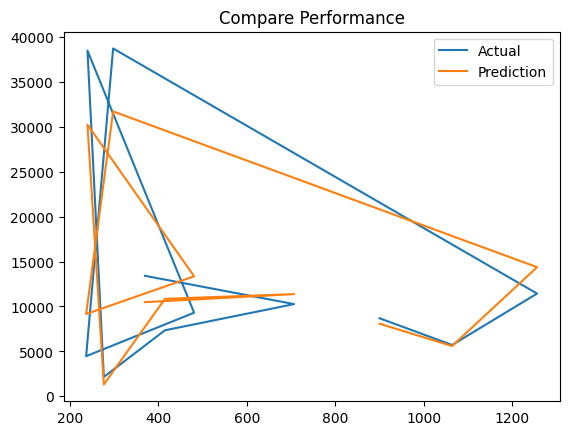

In [37]:
plt.plot(df['Actual'].iloc[0:11],label="Actual")
plt.plot(df['Prediction'].iloc[0:11],label="Prediction")

plt.tight_layout
plt.title("Compare Performance")
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import r2_score

In [39]:
score=r2_score(y_test,y_pred)
print(score)

0.8068466322629111


In [40]:
print(1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.8024063249586102


In [41]:
y_train_pred = regression.predict(X_train)
y_test_pred = regression.predict(X_test)

In [42]:
score = r2_score  
r2_train = score(y_train,y_train_pred)
r2_test=score(y_test,y_test_pred)

In [43]:
print(f"R² Score on Training Data: {r2_train:.4f}")
print(f"R² Score on Testing Data: {r2_test:.4f}")

R² Score on Training Data: 0.7297
R² Score on Testing Data: 0.8068


In [44]:
data={'age':42,
     'sex':0,
     'bmi':40.30,
     'children':4,
     'smoker':0,
     'region':0}

In [45]:
df1=pd.DataFrame(data,index=[0])
df1

,age,sex,bmi,children,smoker,region
0,42,0,40.3,4,0,0


In [46]:
new_pred=regression.predict(df1)
print("Medical Insurance Cost For New Customer Is:",new_pred[0])

Medical Insurance Cost For New Customer Is: 237977.9772073942


d:\Python\Project\Health_Insurance_Cost_Prediction\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [47]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(regression,open('regression.pkl','wb'))